In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import robust

In [48]:
SIZE = 100
DIMENTION = 5000

In [49]:
normal_distrib = np.random.normal(size=(DIMENTION,SIZE))
coshi_distrib = np.random.standard_cauchy(size=(DIMENTION,SIZE))
mix_distrib =  0.9 * np.random.normal(0, 1, size=(DIMENTION,SIZE)) + \
                  0.1 * np.random.standard_cauchy(size=(DIMENTION,SIZE))

In [50]:
len(normal_distrib[0])

100

In [51]:
def my_huber(data):
    x = np.mean(data)
    if abs(x) < 1.44:
        return x
    else:
        return (-1.44,1,44)[x>1.44]
    
def two_stage_estimator_fun(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Вычисление IQR
    iqr = q3 - q1

    # Определение границ для выбросов
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Отбрасывание выбросов
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return np.mean(filtered_data)


In [52]:

means = {'norm':[], 'coshi':[], 'mix':[]}
medians = {'norm':[], 'coshi':[], 'mix':[]}
huber_estimates = {'norm':[], 'coshi':[], 'mix':[]}
two_stage_estimates = {'norm':[], 'coshi':[], 'mix':[]}
for i in range (DIMENTION):
    means['norm'].append(np.mean(normal_distrib[i]))
    means['coshi'].append(np.mean(coshi_distrib[i]))
    means['mix'].append(np.mean(mix_distrib[i]))
    
    medians['norm'].append(np.median(normal_distrib[i]))
    medians['coshi'].append(np.median(coshi_distrib[i]))
    medians['mix'].append(np.median(mix_distrib[i]))
    
    huber_estimates['norm'].append(my_huber(normal_distrib[i]))
    huber_estimates['coshi'].append(my_huber(coshi_distrib[i]))
    huber_estimates['mix'].append(my_huber(mix_distrib[i]))
    
    two_stage_estimates['norm'].append(two_stage_estimator_fun(normal_distrib[i]))
    two_stage_estimates['coshi'].append(two_stage_estimator_fun(coshi_distrib[i]))
    two_stage_estimates['mix'].append(two_stage_estimator_fun(mix_distrib[i]))
    

C:\Users\Bruhonog\AppData\Local\Temp\ipykernel_27868\2263172887.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return (-1.44,1,44)[x>1.44]


In [57]:
#Нормальное распределение 
def res_print(types):
    for type_ in types:
        print(f'\n-------{type_}-------')
        
        print("\nСреднее выборочное:")
        print("Среднее:", np.mean(means[type_]), "Дисперсия:", np.var(means[type_]))

        print("\nВыборочная медиана:")
        print("Среднее:", np.mean(medians[type_]), "Дисперсия:", np.var(medians[type_]))

        print("\nОценка Хубера:")
        print("Среднее:", np.mean(huber_estimates[type_]), "Дисперсия:", np.var(huber_estimates[type_]))

        print("\nДвухэтапная оценка:")
        print("Среднее:", np.mean(two_stage_estimates[type_]), "Дисперсия:", np.var(two_stage_estimates[type_]))
res_print(['norm', 'coshi', 'mix'])


-------norm-------

Среднее выборочное:
Среднее: -0.0008762764908339381 Дисперсия: 0.009928170321752658

Выборочная медиана:
Среднее: -0.0010818332506409994 Дисперсия: 0.01526979090550105

Оценка Хубера:
Среднее: -0.0008762764908339381 Дисперсия: 0.009928170321752658

Двухэтапная оценка:
Среднее: -0.00012793473409419053 Дисперсия: 0.010741379017422592

-------coshi-------

Среднее выборочное:
Среднее: 2.803551001107575 Дисперсия: 30090.681853131067

Выборочная медиана:
Среднее: 1.6769520281343376e-05 Дисперсия: 0.02531214677308996

Оценка Хубера:
Среднее: -0.12200752007204237 Дисперсия: 0.8865911604414319

Двухэтапная оценка:
Среднее: -8.129598056005207e-05 Дисперсия: 0.03583152656918046

-------mix-------

Среднее выборочное:
Среднее: -0.08165250055739132 Дисперсия: 100.20549730833817

Выборочная медиана:
Среднее: -0.0009271203737865208 Дисперсия: 0.014961023402503312

Оценка Хубера:
Среднее: -0.008295965418886182 Дисперсия: 0.1493216387590051

Двухэтапная оценка:
Среднее: -0.0021604

In [106]:
def get_graph(dict_,name):
    name_arr = ['norm', 'coshi', 'mix']
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15))

    for i,type_ in enumerate(dict_.keys()):
        ax[i].set_title(name_arr[i])
        ax[i].plot(dict_[type_])
    fig.suptitle(name,fontsize=20)
    plt.show()

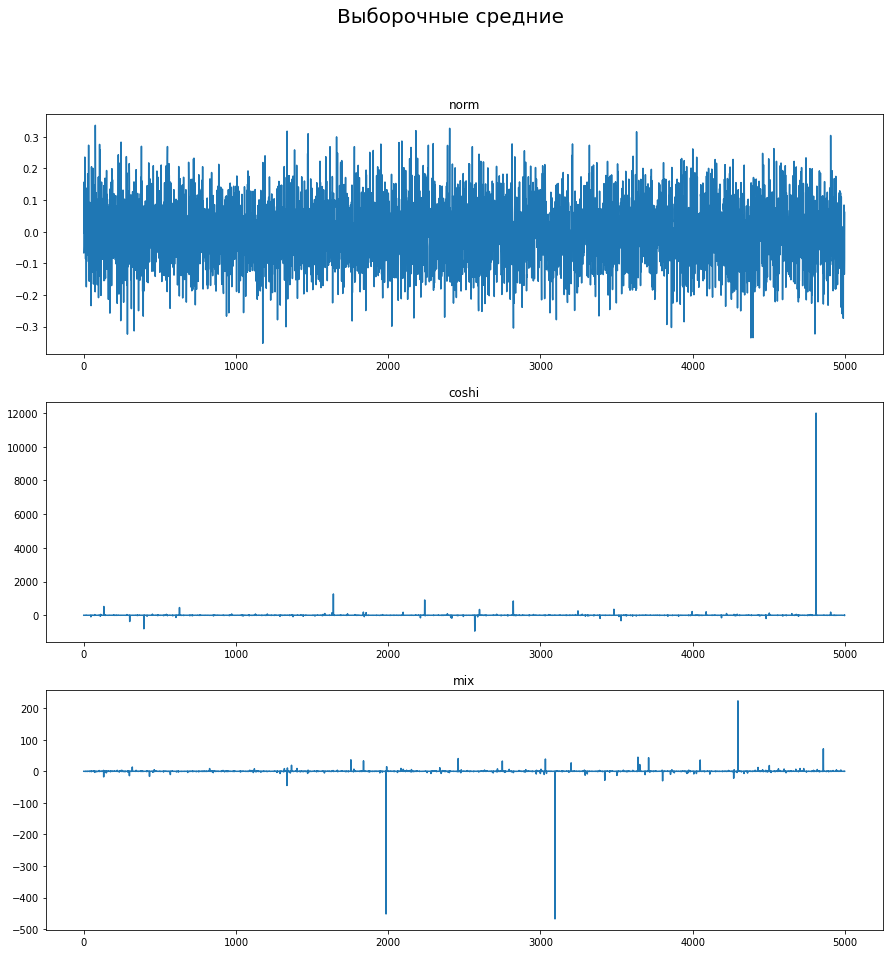

In [107]:
get_graph(means,'Выборочные средние')

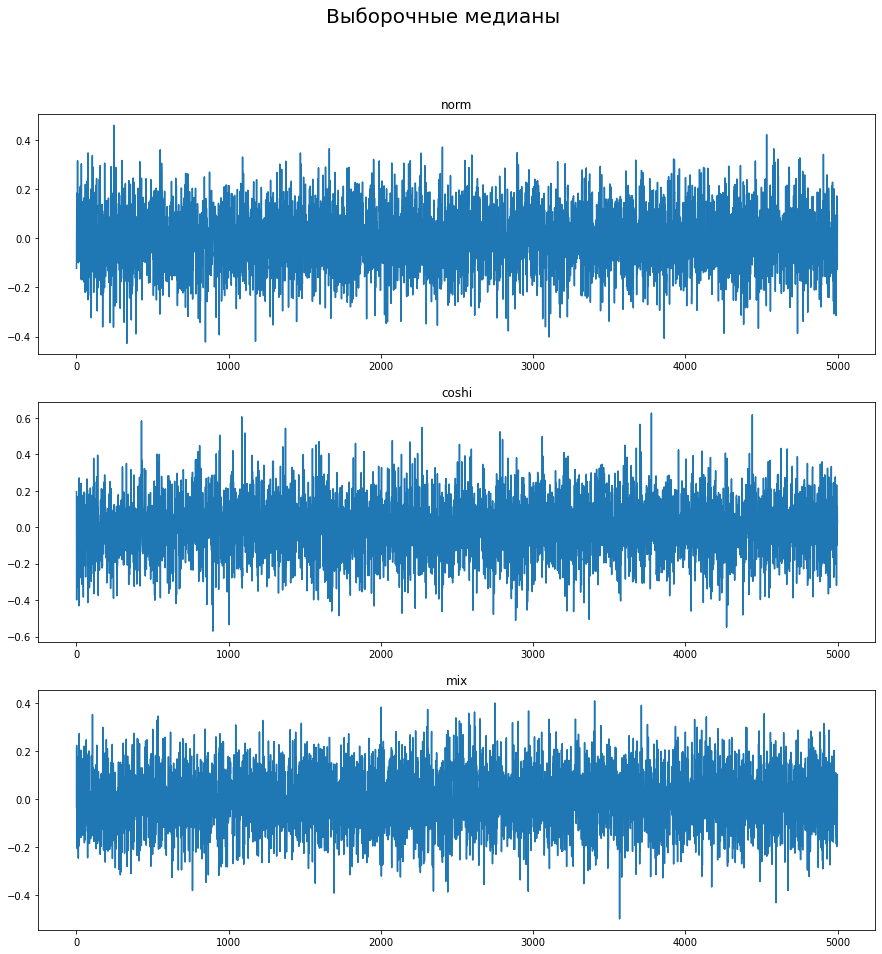

In [108]:
get_graph(medians, 'Выборочные медианы')

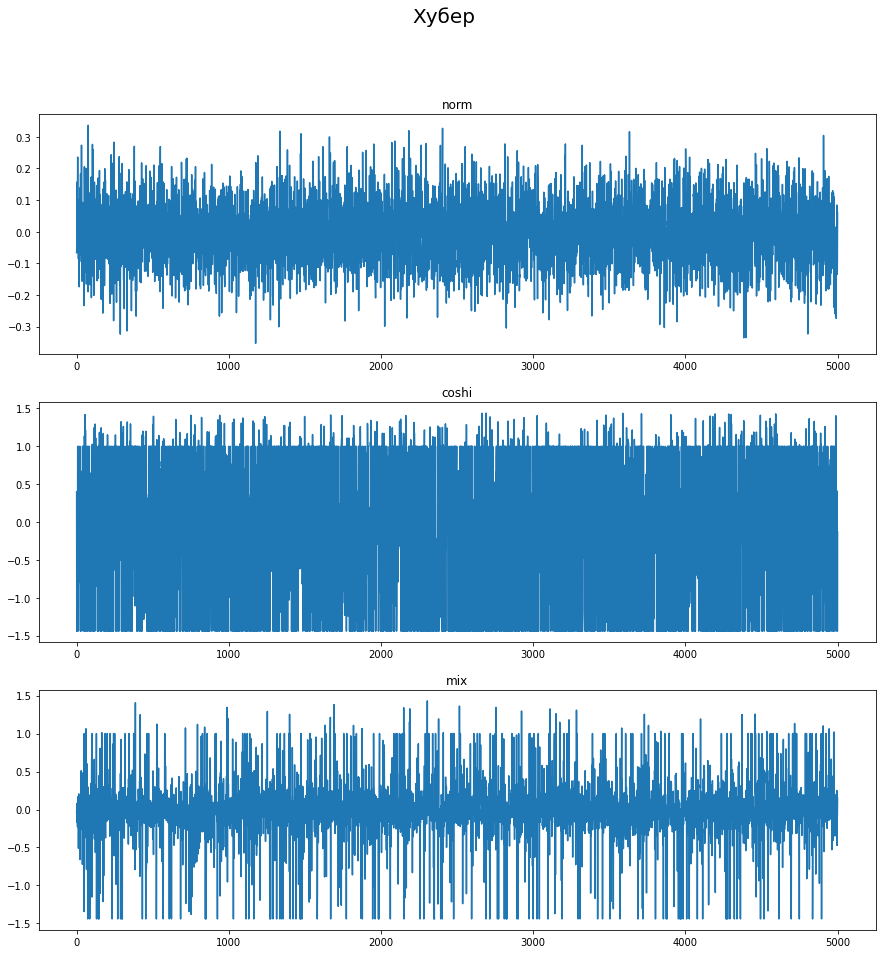

In [109]:
get_graph(huber_estimates, 'Хубер')

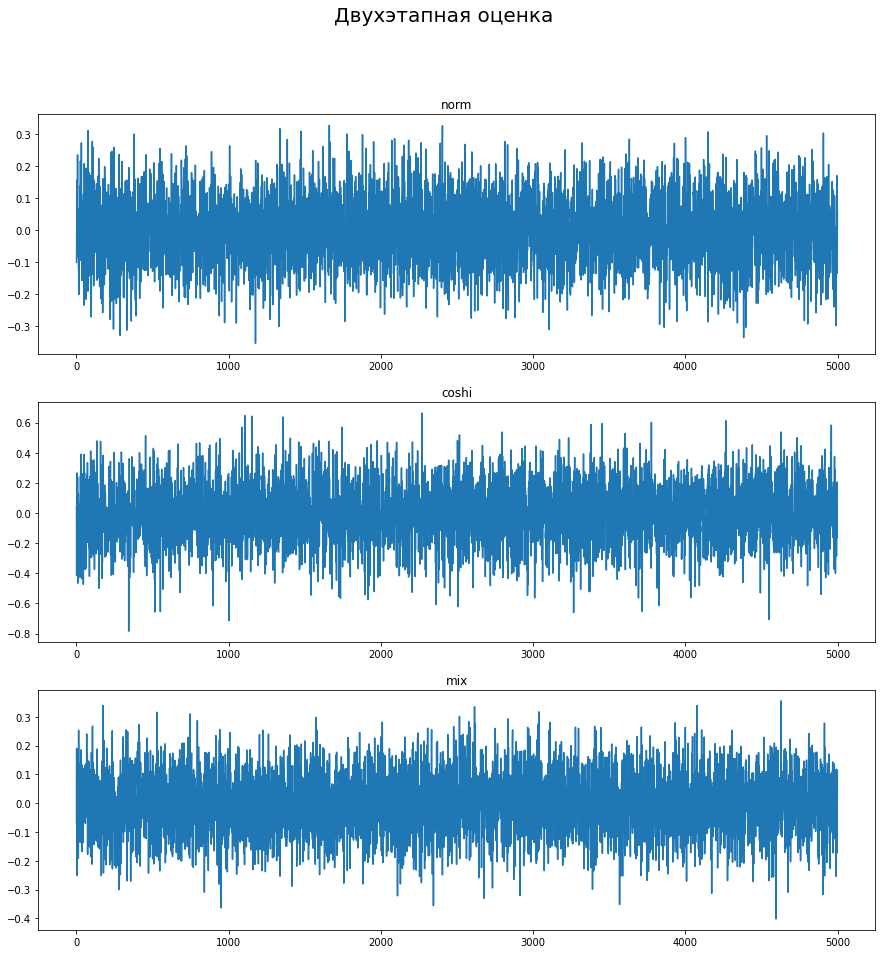

In [110]:
get_graph(two_stage_estimates, 'Двухэтапная оценка')

In [111]:
def get_hist(dict_,name):
    name_arr = ['norm', 'coshi', 'mix']
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15))

    for i,type_ in enumerate(dict_.keys()):
        ax[i].set_title(name_arr[i])
        ax[i].hist(dict_[type_],bins=20)
    fig.suptitle(name,fontsize=20)
    plt.show()

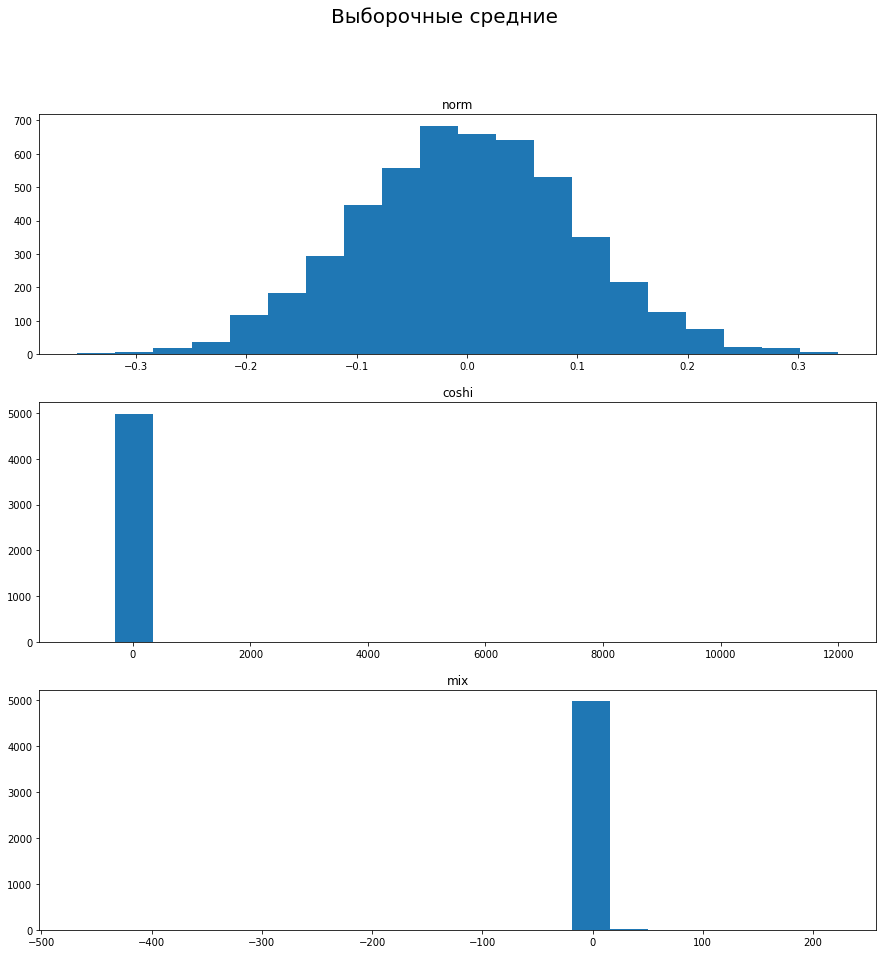

In [112]:
get_hist(means,'Выборочные средние')

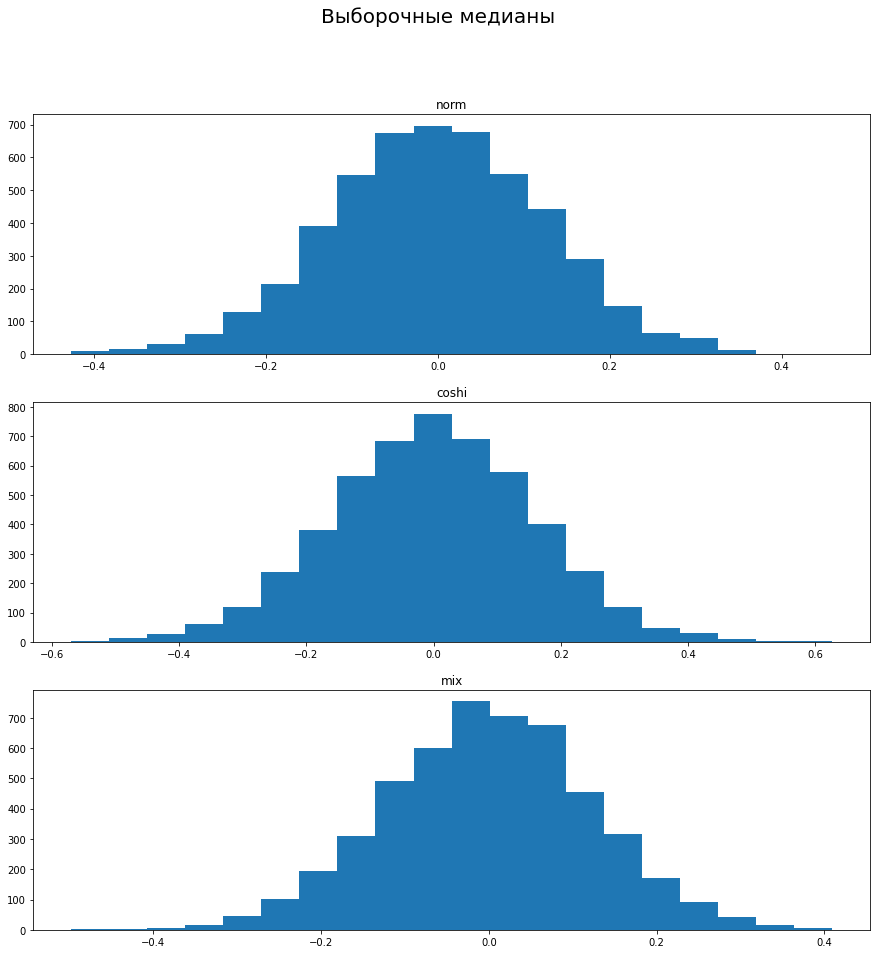

In [113]:
get_hist(medians, 'Выборочные медианы')

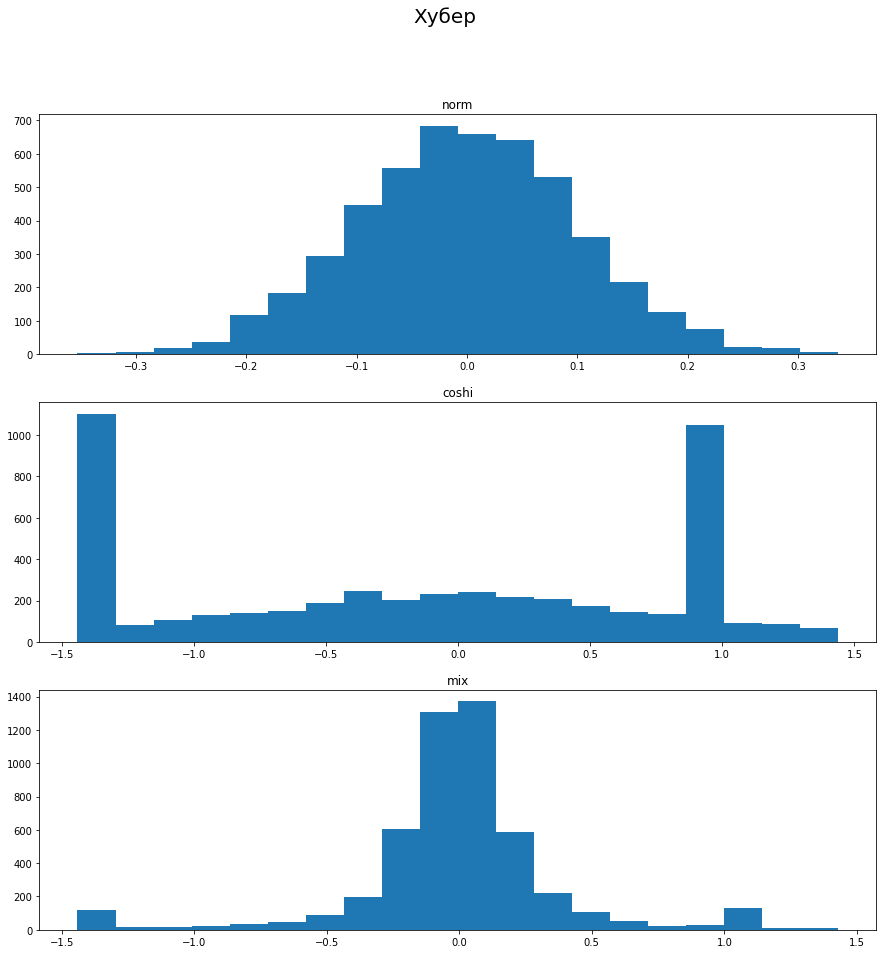

In [114]:
get_hist(huber_estimates,'Хубер')

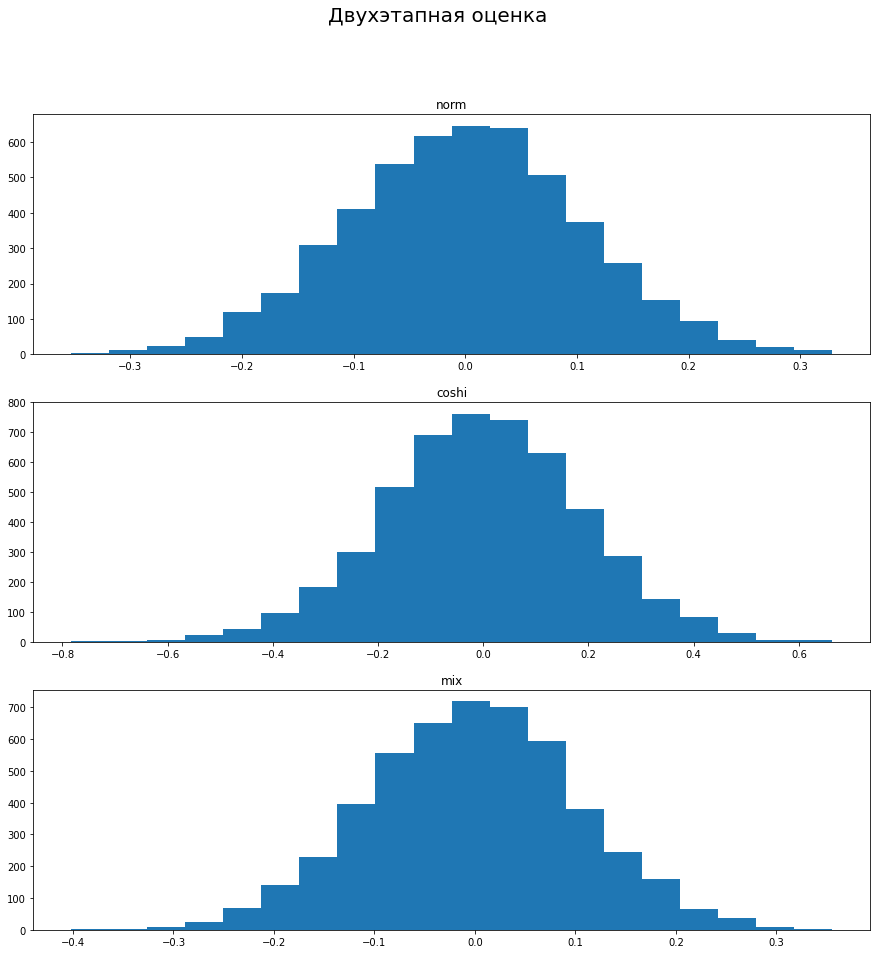

In [116]:
get_hist(two_stage_estimates,'Двухэтапная оценка')